In [1]:
from fastai.basics import *
from fastai.gen_doc.nbdoc import *
from fastai.vision import *

In [2]:
def norm_y_(y):
    if y.shape[0] == 1:
        y = (y//255)
    return y
norm_y = TfmPixel(norm_y_)

_tfms = get_transforms()
tfms = [_tfms[0]+[norm_y()], _tfms[1]+[norm_y()]]

In [16]:
#указываем пути к нашим данным, размер эпохи
data = (SegmentationItemList.from_folder(r'data\Botnar\Colored')
       .split_by_rand_pct()
       .label_from_func(lambda path: path.parent.parent/'White'/f'white{path.stem[5:]}.png', classes=np.array(['Background','Block']))
       .transform(tfms, tfm_y=True)
       .databunch(bs=4, path='./temp/', num_workers=0)
       .normalize(imagenet_stats))

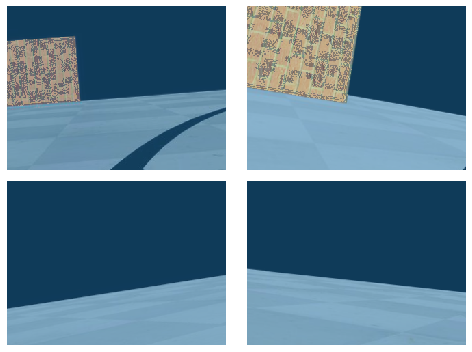

In [19]:
data.show_batch(rows=2, figsize=(7,5))

In [23]:
#обучаем нейронку на основе модели ResNet с 18 слоями, указываем входные данные, выбираем метрику для оценивания точности предсказания
learn = unet_learner(data, models.resnet18, metrics=dice)
#говорим сколько у нас эпох и какой коэффициент обучения(learning rate)
learn.fit_one_cycle(4,1e-4)
learn.save('FroMod')

epoch,train_loss,valid_loss,dice,time
0,0.550109,0.130202,0.349400,1:00:35
1,0.225411,0.100097,0.813372,36:38
2,0.138505,0.099637,0.790707,43:27
3,0.107639,0.097002,0.820479,54:53


In [30]:
#Для повторного использования сети делаем экспорт, а когда хотим использовать просто указываем папку
learn.export()
learn.export('FroMod')

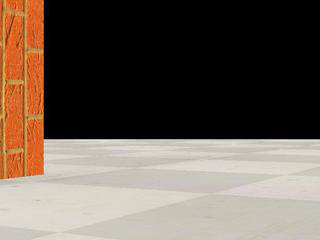

In [25]:
data.valid_ds[10][0]

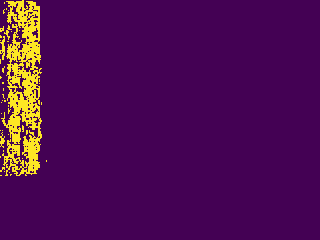

In [27]:
learn.predict(data.valid_ds[10][0])[0]
